In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [164]:
# import data
train_data = pd.read_csv("../../Datasets/HousePrice/train.csv")
test_data = pd.read_csv("../../Datasets/HousePrice/test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Analyse SalePrice

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

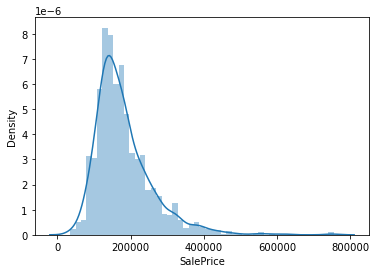

In [6]:
sns.distplot(train_data['SalePrice'])

### Non-Numeric Variant

##### Missing features

In [121]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479


In [124]:
missing_features = missing_data.index[:5]

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [128]:
object_features = train_data.drop(columns = missing_features).iloc[:,1:].select_dtypes(include = object).columns
object_features, len(object_features)

(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'),
 38)

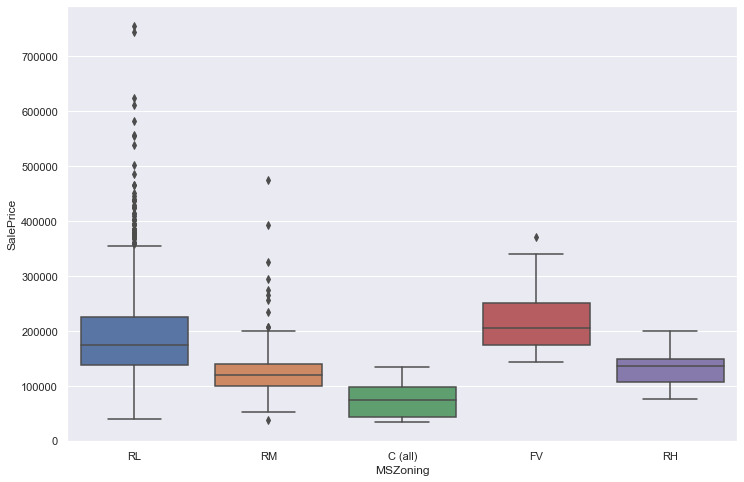

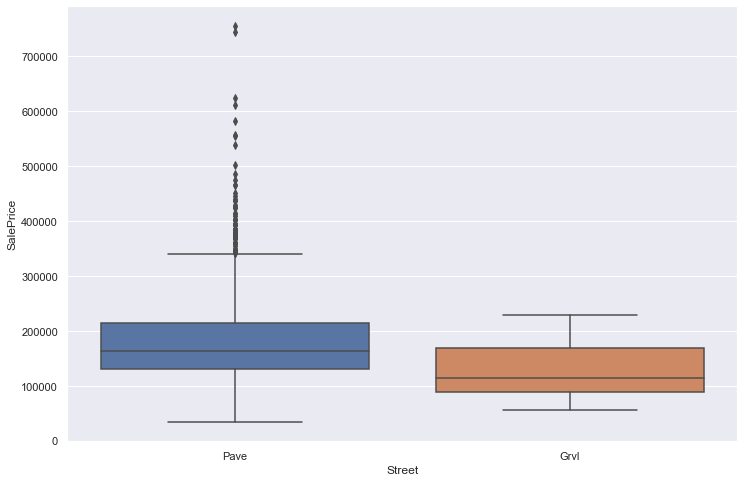

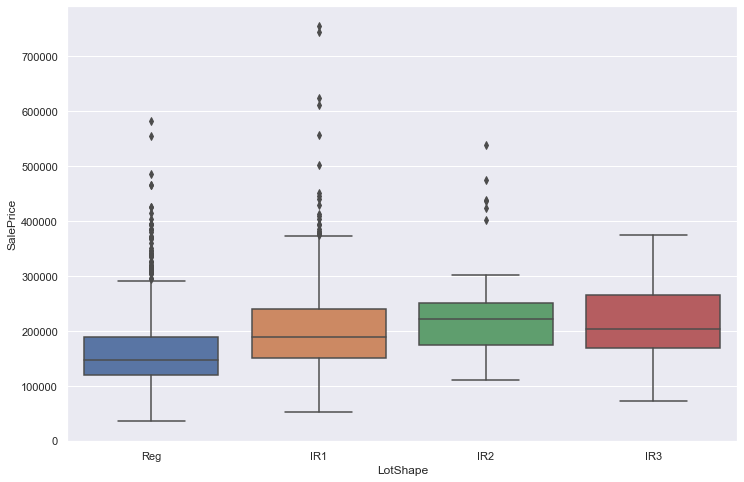

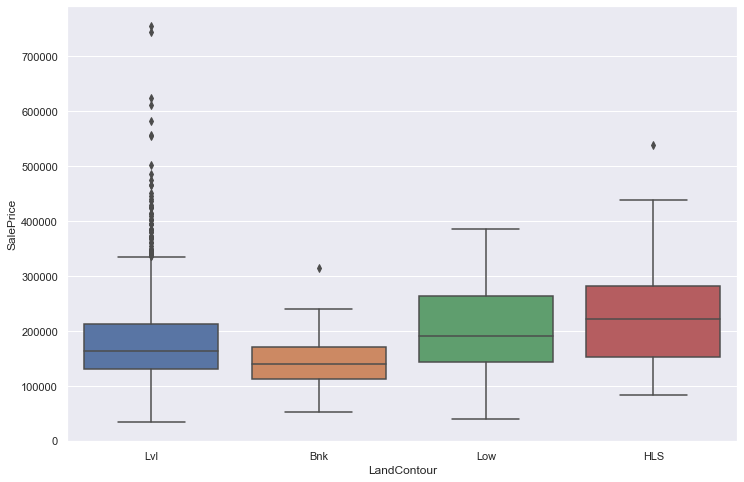

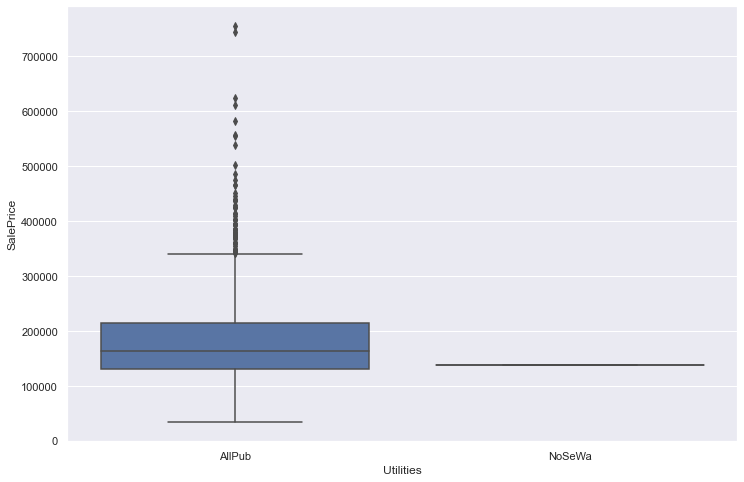

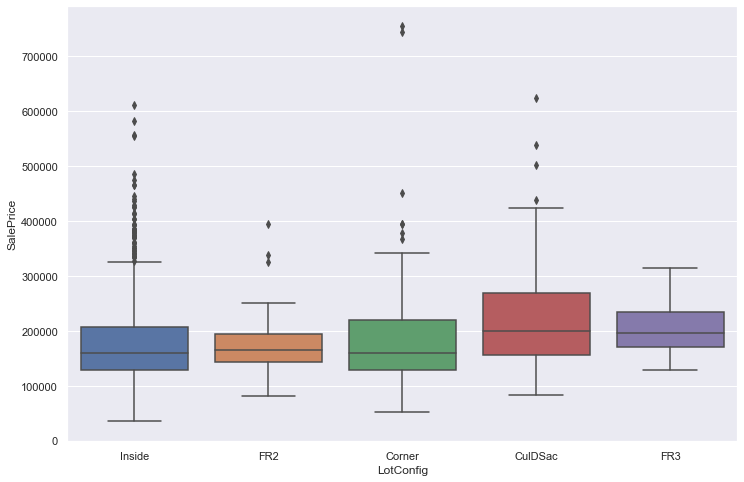

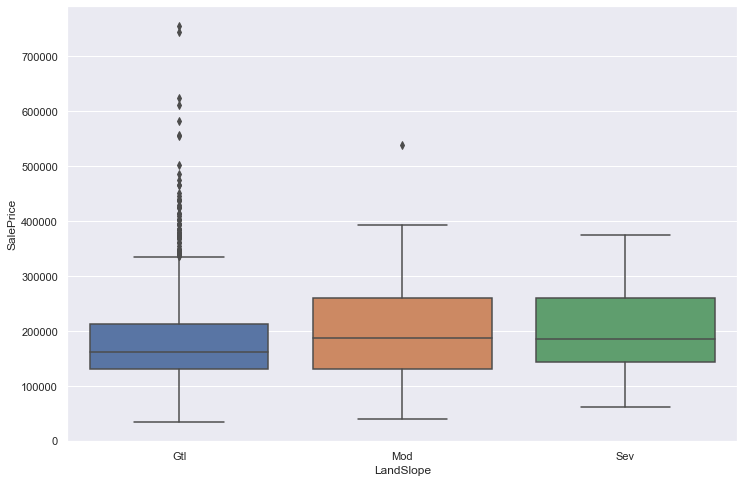

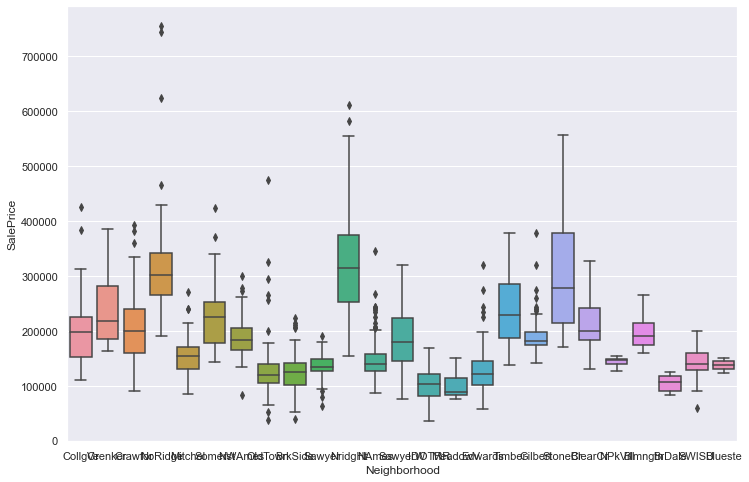

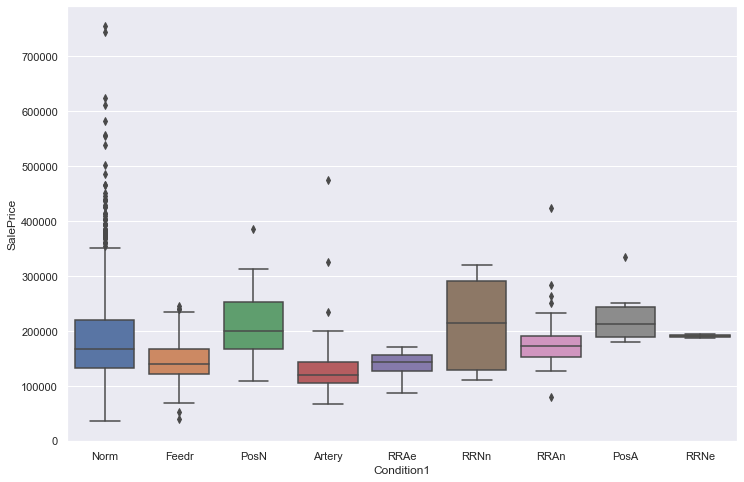

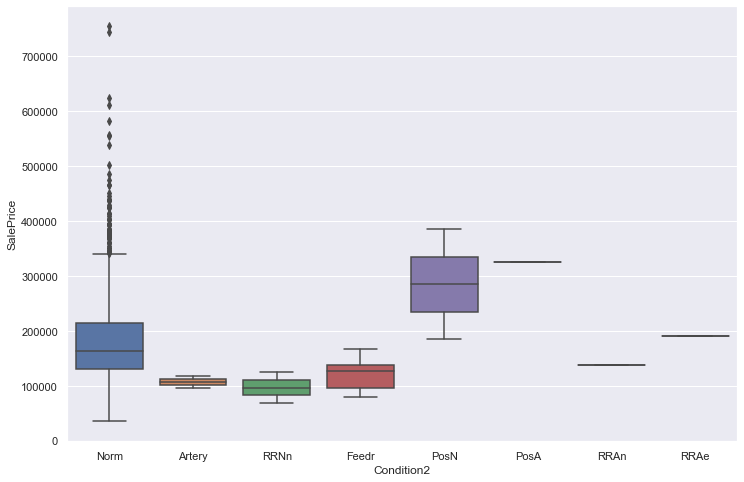

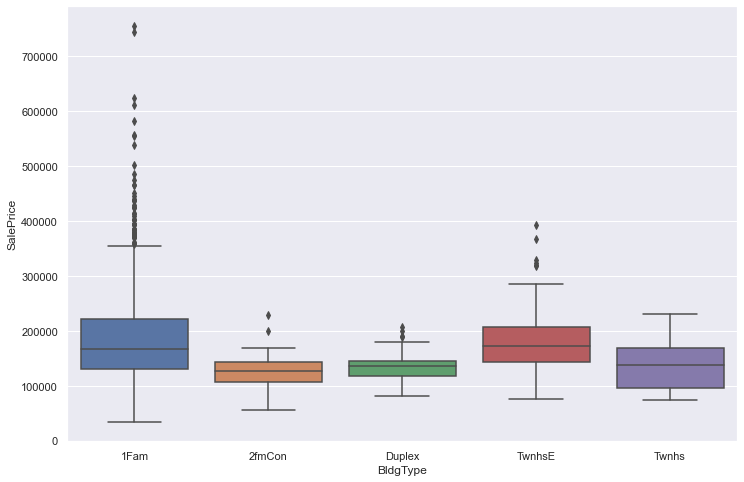

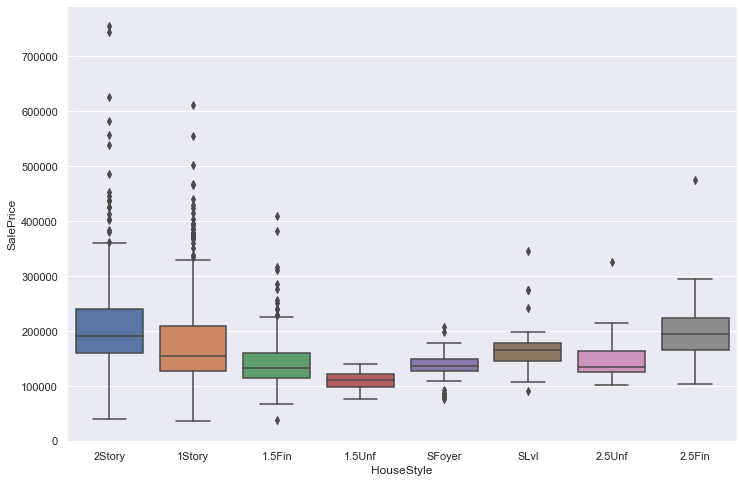

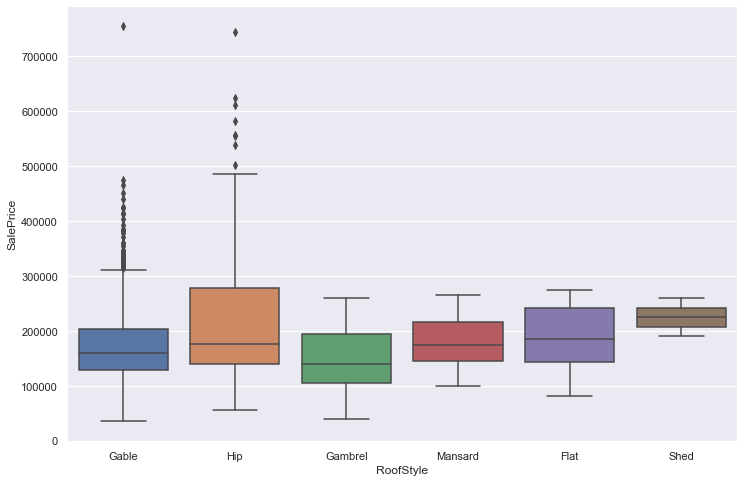

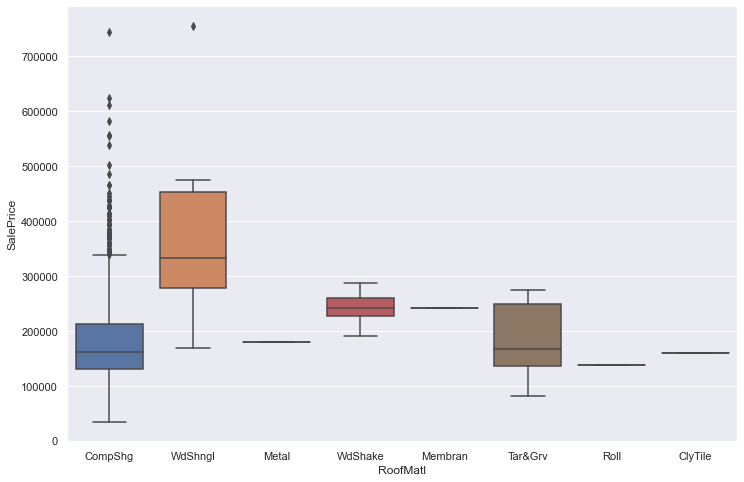

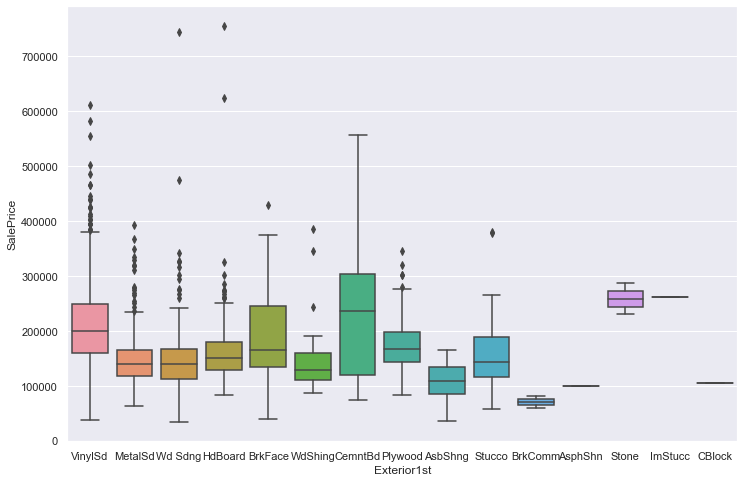

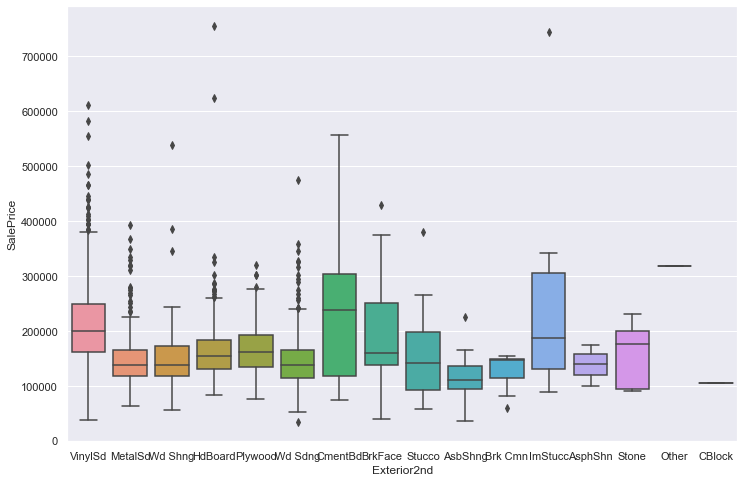

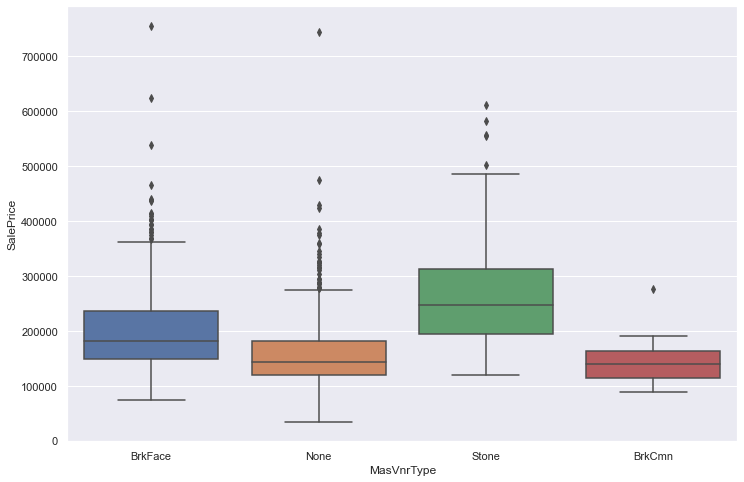

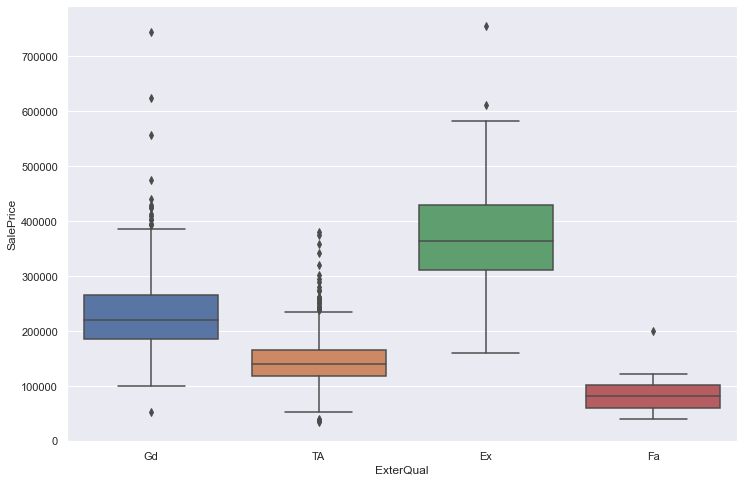

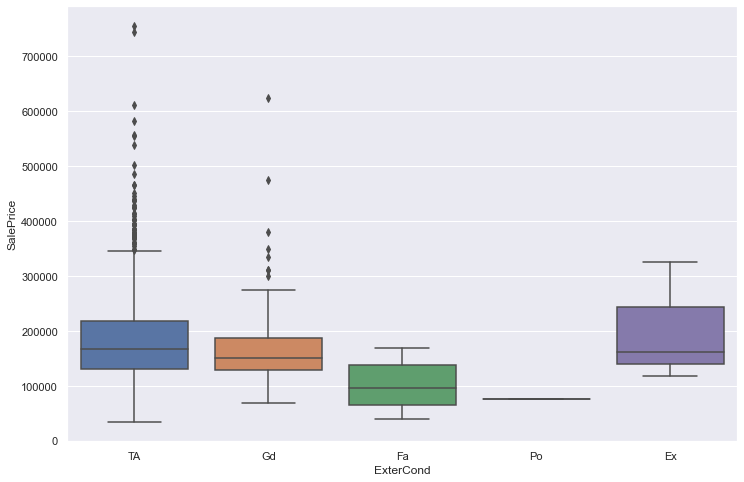

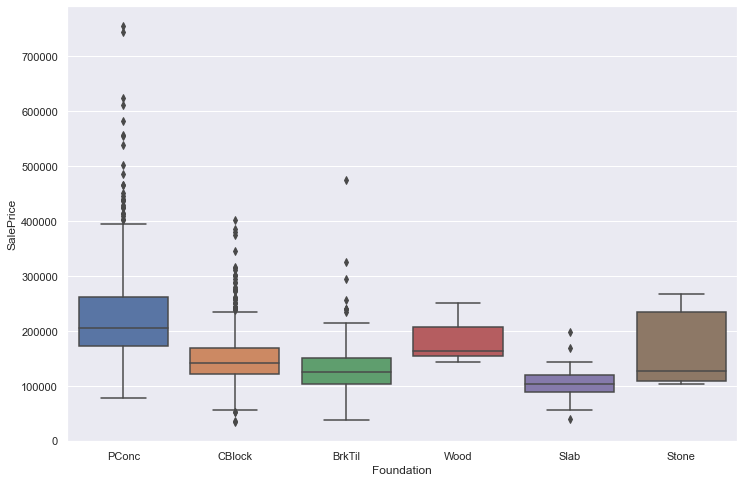

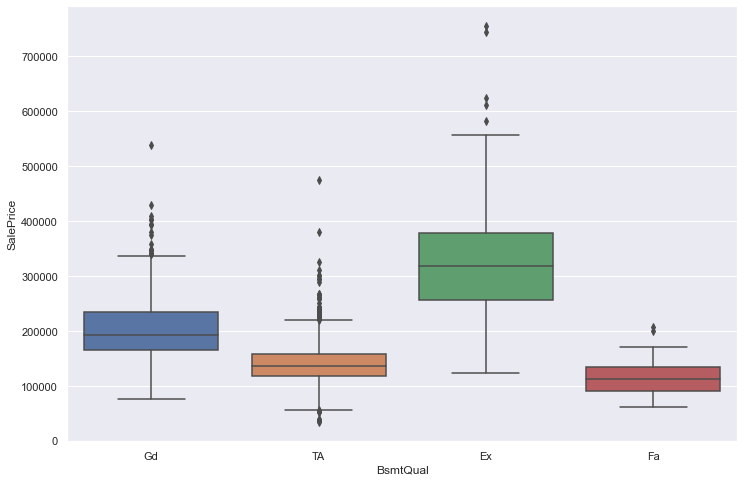

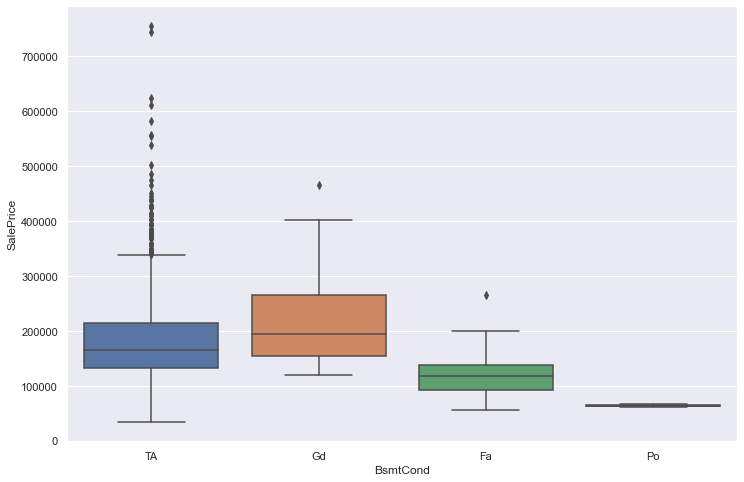

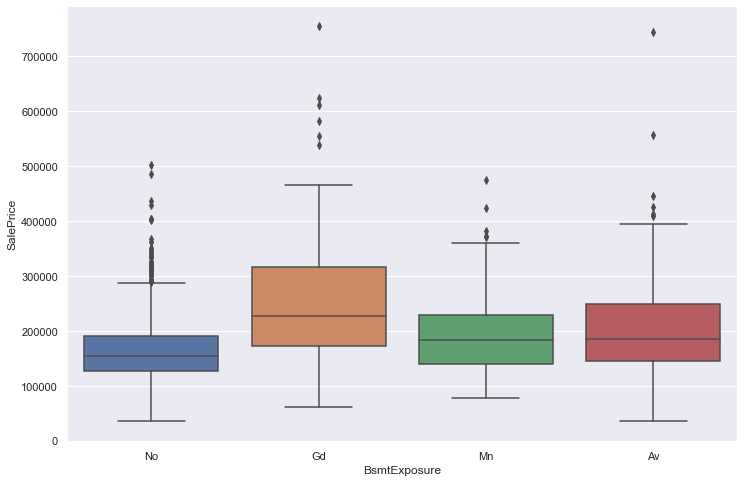

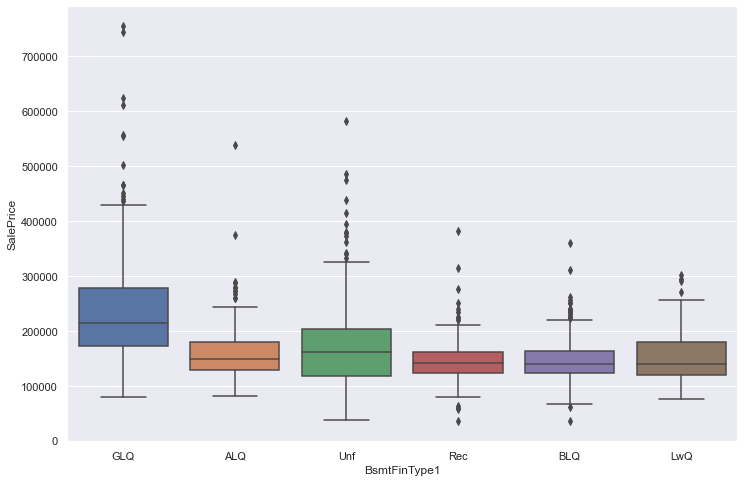

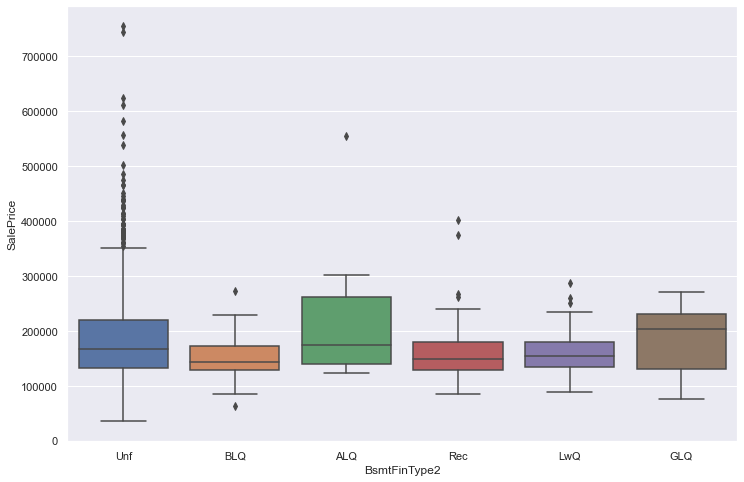

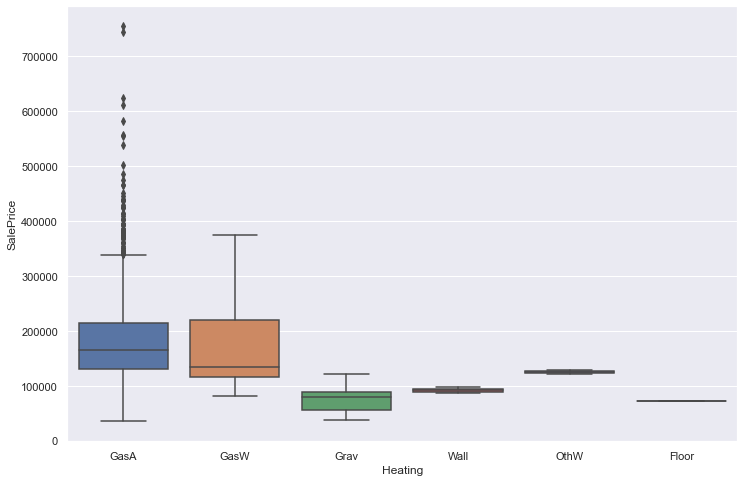

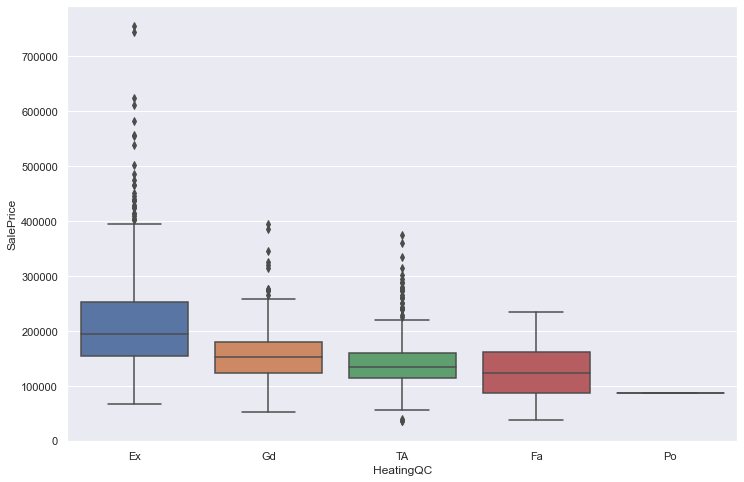

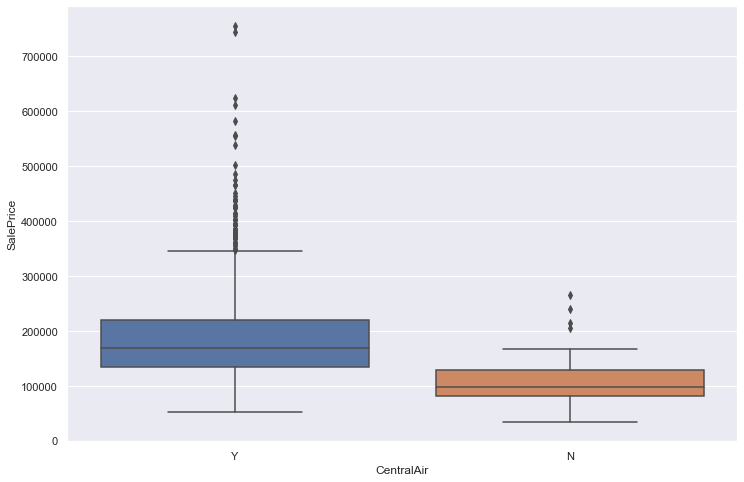

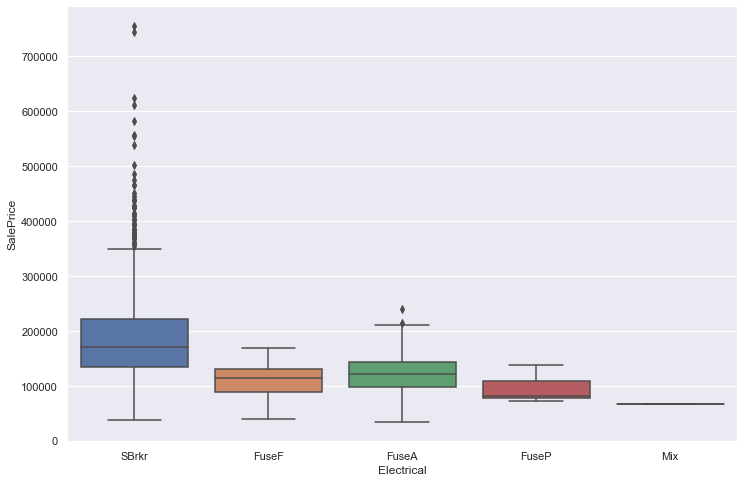

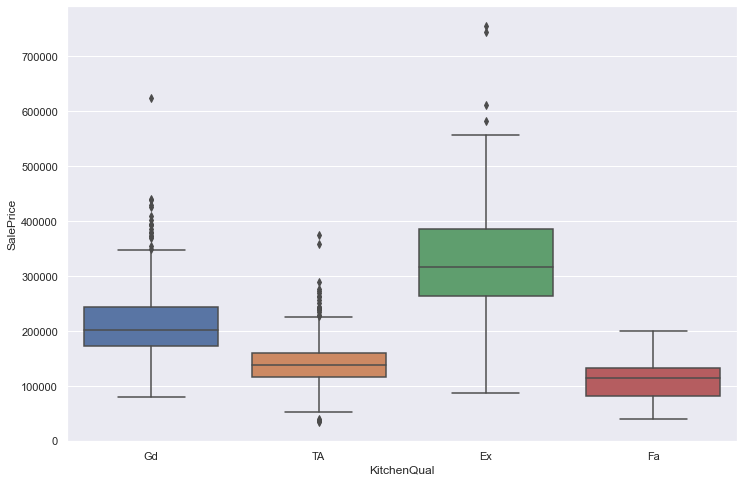

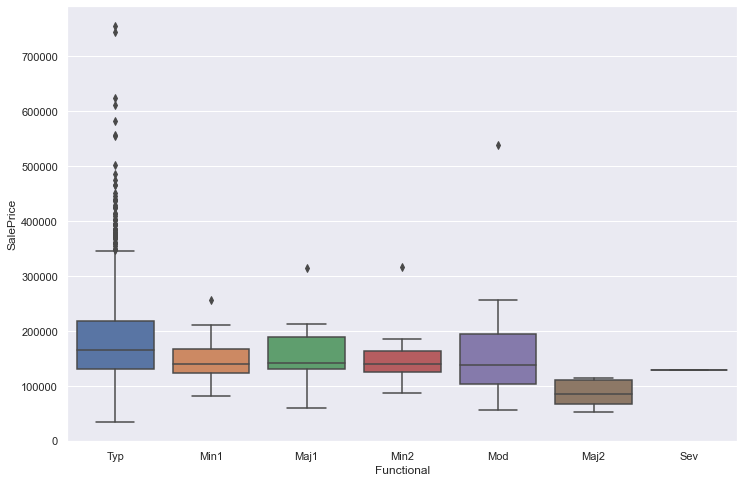

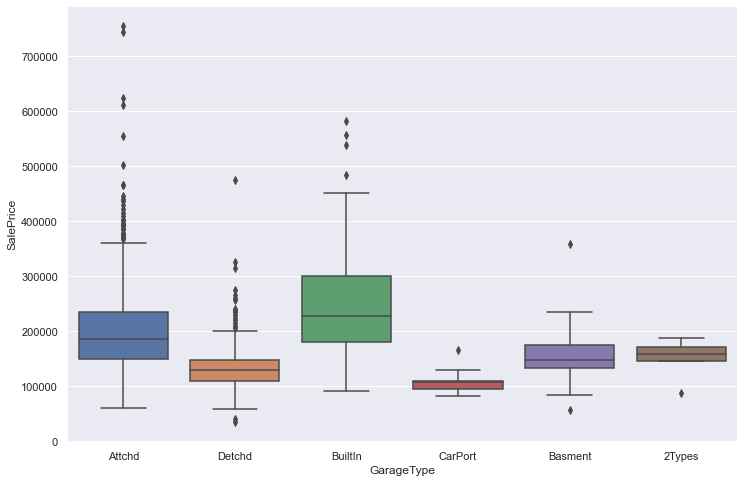

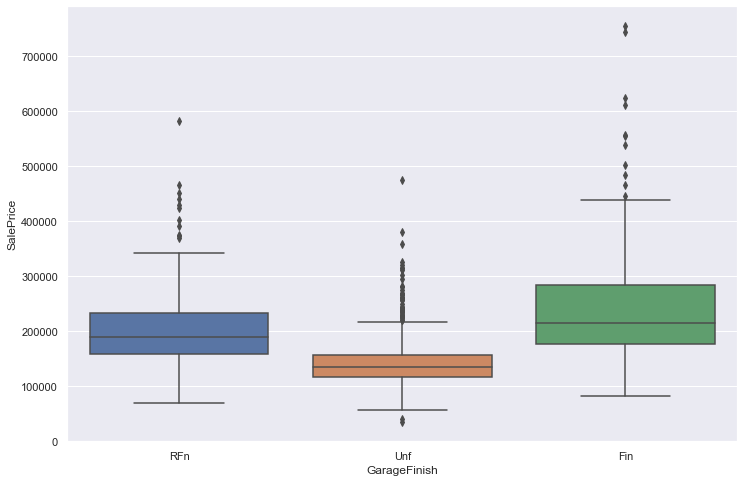

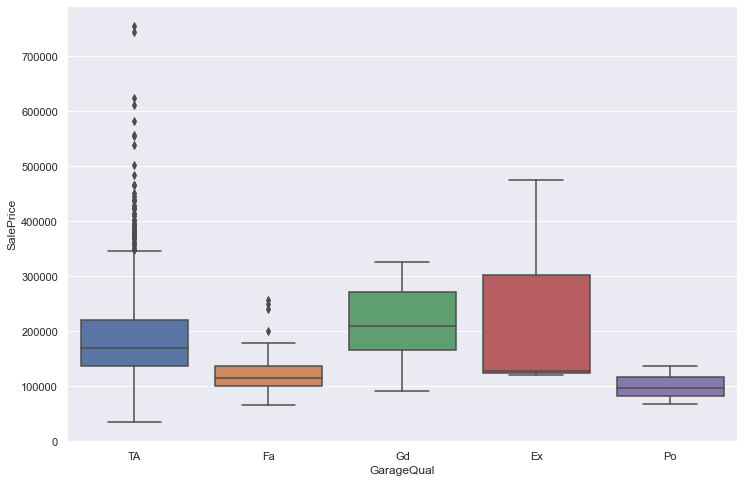

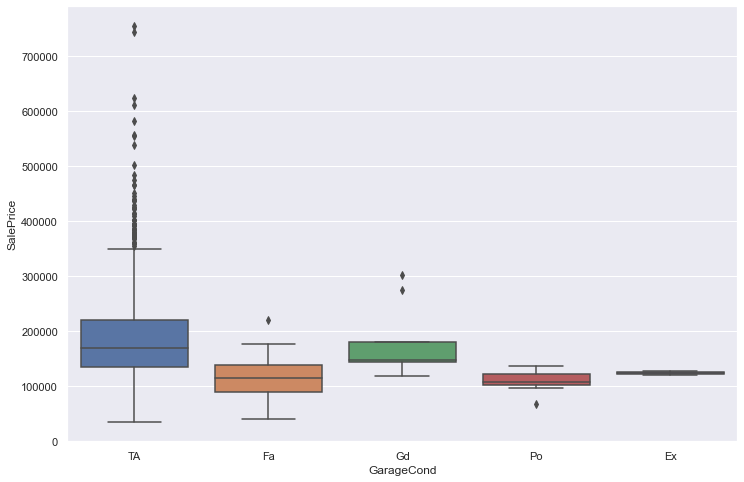

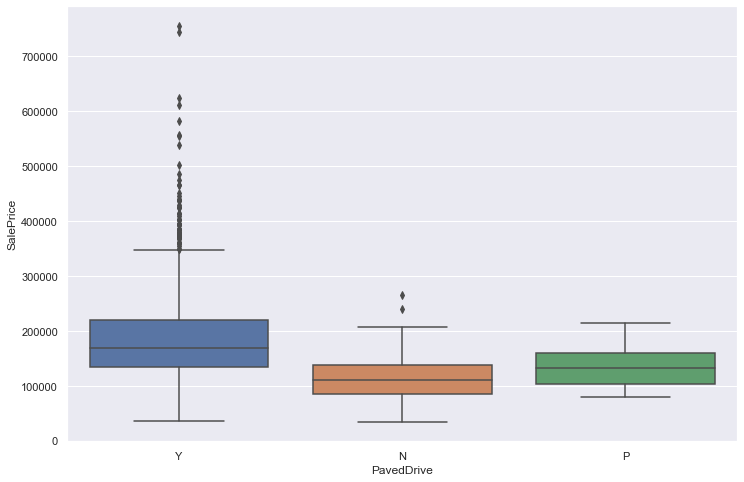

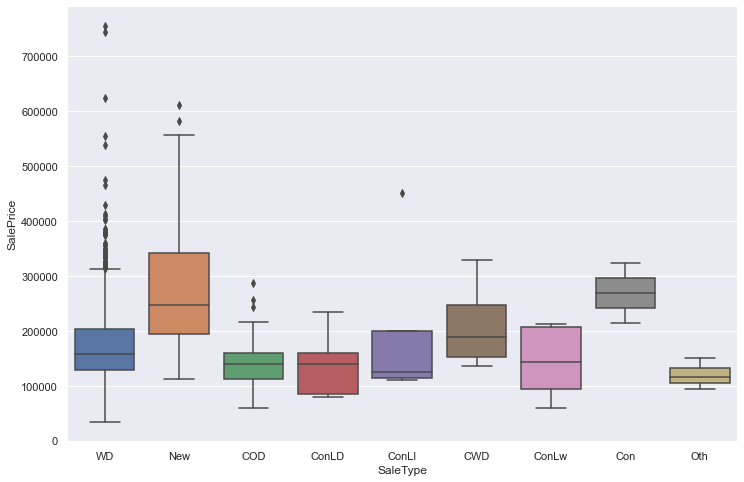

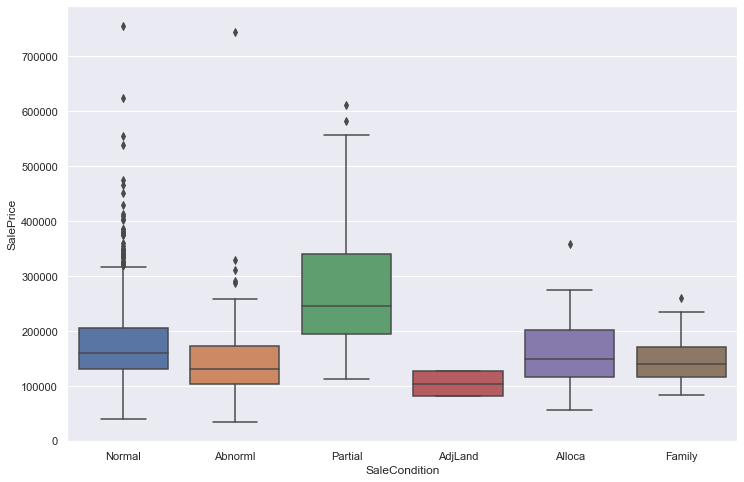

In [129]:
for feature in object_features:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=feature, y="SalePrice", data=train_data) 
    plt.plot()

#### Encoding

In [165]:
import category_encoders as ce
target_enc = ce.TargetEncoder(cols=['MSZoning','Neighborhood','Condition1','Condition2','HouseStyle', 'MasVnrType', 'ExterQual',
                                    'Foundation', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
                                    'GarageCond','PavedDrive', 'SaleType', 'SaleCondition'])
train_data = train_data.join(target_enc.fit_transform(train_data[['MSZoning','Neighborhood','Condition1','Condition2','HouseStyle', 'MasVnrType', 'ExterQual',
                                    'Foundation', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
                                    'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']],train_data['SalePrice']).add_suffix('_target'))

### Numeric Variant

In [144]:
numeric = train_data.iloc[:,1:].select_dtypes(include = [np.int64, np.float64]).columns
numeric, len(numeric)

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice', 'MSZoning_target',
        'Neighborhood_target', 'Condition1_target', 'Condition2_target',
        'HouseStyle_target', 'MasVnrType_target', 'ExterQual_target',
        'Foundation_target', 'BsmtQual_target', 'CentralAir_target',
        'KitchenQual_target', 'GarageType_target', 'GarageFinish_target',
        'GarageQual_target', 'GarageCond_target', 'PavedDrive_target',
        'SaleType_target', 'SaleCondition_targe

### 矩阵图

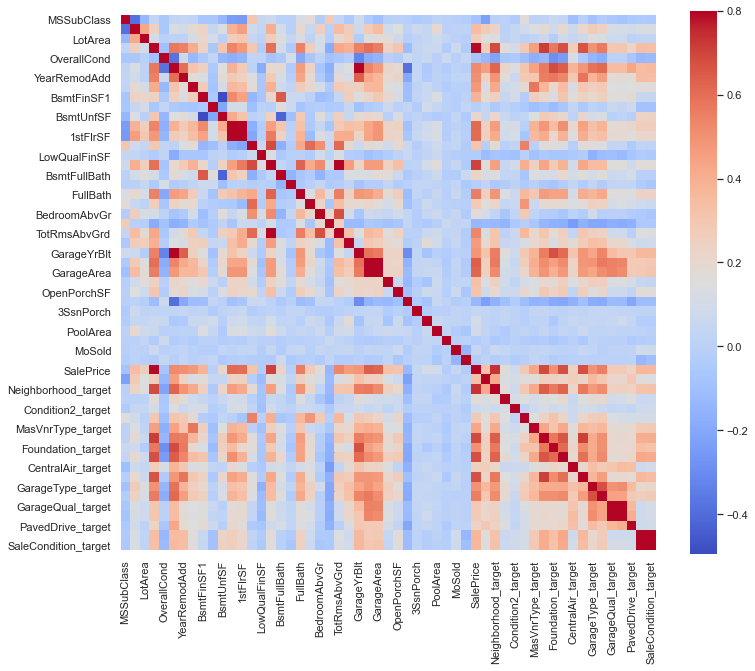

In [145]:
corrmat = train_data[numeric].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap = 'coolwarm')
plt.show()

Index(['SalePrice', 'OverallQual', 'Neighborhood_target', 'GrLivArea',
       'ExterQual_target', 'BsmtQual_target', 'KitchenQual_target',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'GarageFinish_target', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Foundation_target', 'GarageType_target', 'GarageYrBlt', 'MasVnrArea'],
      dtype='object')


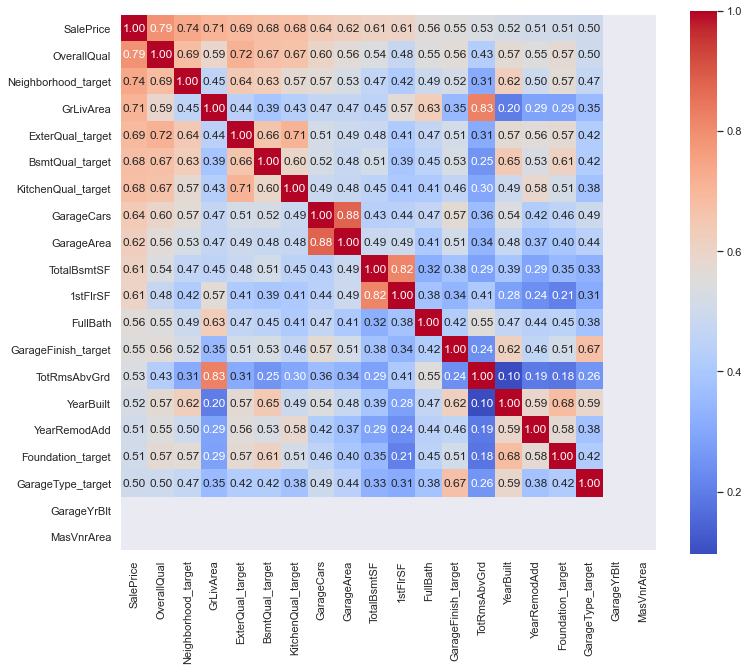

In [148]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train_data[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values, cmap = 'coolwarm')
plt.show()

In [166]:
features = ['OverallQual', 'Neighborhood_target', 'GrLivArea',
       'ExterQual_target', 'BsmtQual_target', 'KitchenQual_target',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'GarageFinish_target', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Foundation_target', 'GarageType_target', 'GarageYrBlt', 'MasVnrArea']

In [167]:
train_data.fillna(train_data.mean(),inplace=True)

In [187]:
from sklearn import linear_model, svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
reg = svm.SVR()
scaler = StandardScaler()
x = train_data[features]
x_scaled = scaler.fit_transform(x)
y = train_data['SalePrice']

reg.fit(x_scaled,y)
y_hat = reg.predict(x_scaled)
n = len(y)
rmse = np.sqrt(np.sum((np.log(y_hat) - np.log(y))**2 / n))
print("rmse: ", rmse)

rmse:  0.3992129397731698


### Evaluation

In [170]:
test_data = test_data.join(target_enc.transform(test_data[['MSZoning','Neighborhood','Condition1','Condition2','HouseStyle', 'MasVnrType', 'ExterQual',
                                    'Foundation', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
                                    'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']]).add_suffix('_target'))

In [171]:
test_data.fillna(test_data.mean(),inplace=True)

In [189]:
test_data['SalePrice'] = reg.predict(scaler.transform(test_data[features]))
submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
submission.to_csv('submission_svm.csv', index=False)